<a href="https://colab.research.google.com/github/desstaw/PrivacyPreservingTechniques/blob/main/Anonymizing_PKI_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook preprocesses on the Personal Key Indicators Dataset

In [78]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.impute import SimpleImputer
from fancyimpute import IterativeImputer
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression



url = "https://raw.githubusercontent.com/desstaw/PrivacyPreservingTechniques/main/datasets/personal_key_indicators_heart_disease.csv"
df = pd.read_csv(url)

import warnings
warnings.simplefilter('ignore')

In [80]:
df.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [83]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


### Delete rows with missing values

In [84]:
df.dropna(inplace=True)

df = df.dropna()

In [85]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


### Definig ranges based on statistical distribution on numerical values

BMI ranges
under 18.5 – This is described as underweight. between 18.5 and 24.9 – This is described as the 'healthy range'. between 25 and 29.9 – This is described as overweight. between 30 and 39.9 – This is described as obesity.

(array([1.72840e+04, 1.72106e+05, 1.00863e+05, 2.33270e+04, 4.88800e+03,
        9.37000e+02, 2.61000e+02, 8.70000e+01, 2.90000e+01, 1.30000e+01]),
 array([12.02 , 20.303, 28.586, 36.869, 45.152, 53.435, 61.718, 70.001,
        78.284, 86.567, 94.85 ]),
 <BarContainer object of 10 artists>)

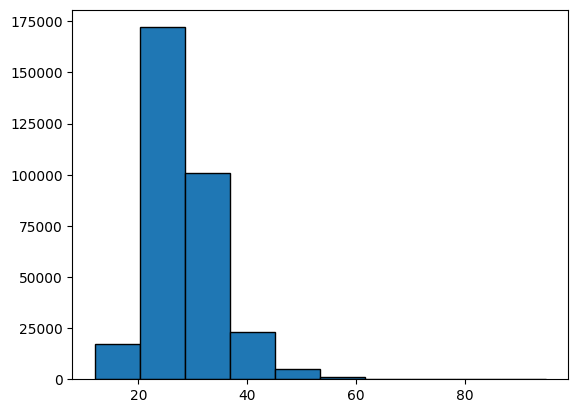

In [86]:
plt.hist(df['BMI'], bins=10, edgecolor='black')

(array([251958.,  20691.,   6823.,   5718.,   3589.,   5257.,   3418.,
           761.,   1297.,  20283.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

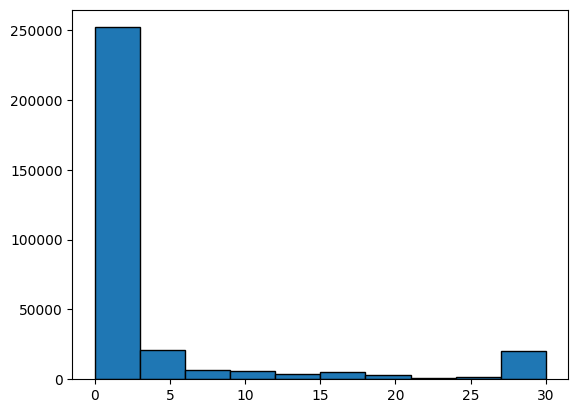

In [87]:
plt.hist(df['PhysicalHealth'], bins=10, edgecolor='black')

(array([231187.,  29994.,   8132.,  10799.,   2915.,  10176.,   5663.,
           518.,   2080.,  18331.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

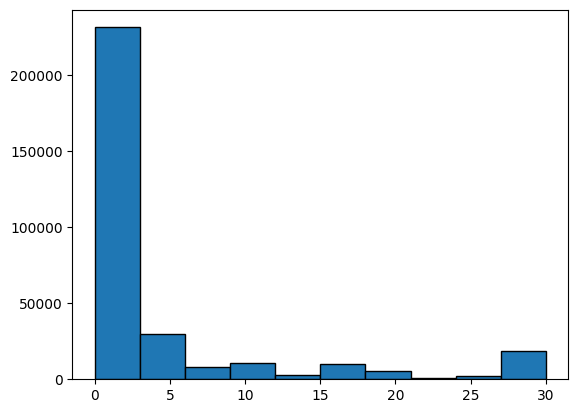

In [88]:
plt.hist(df['MentalHealth'], bins=10, edgecolor='black')

(array([3.33100e+03, 2.69340e+04, 1.64472e+05, 1.21439e+05, 2.62000e+03,
        3.40000e+02, 4.46000e+02, 1.05000e+02, 6.60000e+01, 4.20000e+01]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <BarContainer object of 10 artists>)

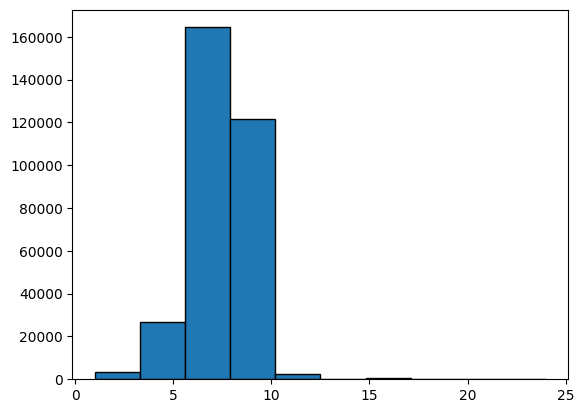

In [89]:
plt.hist(df['SleepTime'], bins=10, edgecolor='black')

In [90]:
print(df["Race"].value_counts().sort_index())
print(df["Diabetic"].value_counts().sort_index())
print(df["GenHealth"].value_counts().sort_index())

American Indian/Alaskan Native      5202
Asian                               8068
Black                              22939
Hispanic                           27446
Other                              10928
White                             245212
Name: Race, dtype: int64
No                         269653
No, borderline diabetes      6781
Yes                         40802
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64
Excellent     66842
Fair          34677
Good          93129
Poor          11289
Very good    113858
Name: GenHealth, dtype: int64


In [91]:
abstraction_mapping = {
    'No': 'No',
    'No, borderline diabetes': 'Other',
    'Yes': 'Yes',
    'Yes (during pregnancy)': 'Other'
}

# Apply the abstraction to the 'Diabetic' column
df['Diabetic'] = df['Diabetic'].map(abstraction_mapping)

In [92]:
abstraction_mapping = {
    'Poor': 'Fair/Poor',
    'Fair': 'Fair/Poor',
    'Good': 'Good',
    'Very good': 'Good',
    'Excellent': 'Good'
}

# Apply the abstraction to the 'Diabetic' column
df['GenHealth'] = df['GenHealth'].map(abstraction_mapping)

### Basic pre-processing

In [93]:
# Define the generalization hierarchy for each BMI and SleepTime
generalization_hierarchy = {
    'BMI': pd.cut(df['BMI'], bins=[0, 18.6, 25.0, 30.0, 95.0]),
    'SleepTime': pd.cut(df['SleepTime'], bins=[0, 3, 5, 7, 9, 20])
}

for col, hierarchy in generalization_hierarchy.items():
    df[col] = pd.cut(df[col], bins=hierarchy.cat.categories, labels=hierarchy.cat.categories[:-1])

###Test for K-anonymity with different k values and different QIs

In [94]:
from collections import Counter

from collections import Counter
# Convert interval column to string type
df['AgeCategory'] = df['AgeCategory'].astype(str)
df['Diabetic'] = df['Diabetic'].astype(str)
df['Race'] = df['Race'].astype(str)




# Define the quasi-identifiers
qi_cols = ['AgeCategory', 'Diabetic','Race' ]

k_anonymity = 10

# Calculate the frequency count of unique combinations of quasi-identifiers
qi_counts = df[qi_cols].apply(tuple, axis=1).value_counts()

# Find the number of records that do not satisfy k-anonymity
num_violations = (qi_counts < k_anonymity).sum()

print("Number of records that do not satisfy k-anonymity:", num_violations)

Number of records that do not satisfy k-anonymity: 7


### Test for l-diversity with l=2 for the sensitive attribute "HeartDisease"

In [95]:
sensitive_attribute = 'HeartDisease'

l_diversity = 2

# Initialize counter
count = 0

# Define the quasi-identifiers
qi_cols = ['AgeCategory', 'Diabetic', 'Race']

# Check l-diversity for each group of records
for qi_vals, group in df.groupby(qi_cols):
    if len(group[sensitive_attribute].unique()) < l_diversity:
        count += len(group)
        #print("l-diversity is not satisfied for the group:", qi_vals)
# Print the total number of records that do not satisfy l-diversity
print(f"Total number of records that do not satisfy l-diversity: {count}")

Total number of records that do not satisfy l-diversity: 790


### Save the dataset

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [97]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Kidney_DS/anonymized_PKI.csv', index=False)